CIFAR10 models adopted from https://github.com/huyvnphan/PyTorch_CIFAR10

In [1]:
#  Colab only
from google.colab import drive
%matplotlib inline


drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Base Imports

In [2]:
import sys
import torch
from torchvision.datasets import CIFAR10, MNIST

PATH = "/content/drive/My Drive/Colab Notebooks/EECS553ML_reproduce/"
sys.path.append(PATH)

In [3]:
import dataset


dataset.MODEL = "ResNet-18"
DATA = MNIST
DATA = CIFAR10

# Model

In [4]:
if DATA is CIFAR10:
    import PyTorch_CIFAR10.cifar10_models.resnet as resnet
    model = resnet.resnet18(pretrained=True)
else:
    import resnet18 as resnet
    model = resnet.ResNet18(size_for_cifar=False)
    model.load_state_dict(torch.load(PATH + "mnist_resnet18_model.t7"))

model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Model Accuracy

In [5]:
from dataset import Dataset


ds = Dataset(model, DATA)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/
170498071/170498071 [==============================] - 4s 0us/step


In [6]:
print("Accuracy of the network on test images:", 
      ds.accuracy_pytorch())

Accuracy of the network on test images: 0.9307


In [7]:
print(f"Model accuracy:", ds.accuracy())

Model accuracy: 0.9307


K = 8
Prediction time for batch size 8: 0.334873 seconds
100% completed
Time: 31.510399 seconds
K = 12
Prediction time for batch size 12: 0.496294 seconds
100% completed
Time: 48.062655 seconds


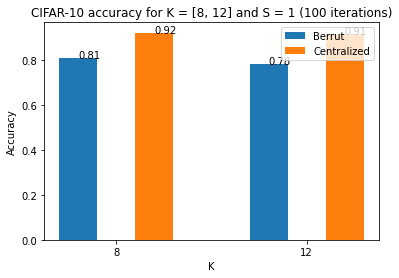

In [8]:
ds.plot_K(S=1, K_list=[8, 12])

K = 8
Prediction time for batch size 8: 0.305007 seconds
100% completed
Time: 32.412299 seconds


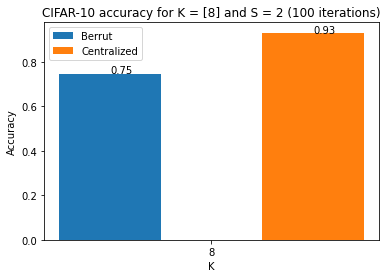

In [9]:
ds.plot_K(S=2)

K = 8
Prediction time for batch size 8: 0.340037 seconds
100% completed
Time: 34.504088 seconds


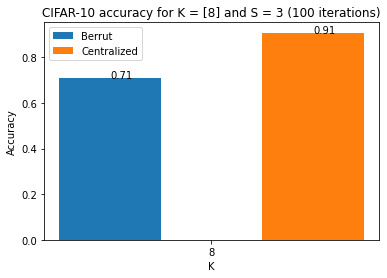

In [10]:
ds.plot_K(S=3)